In [85]:
import ytree
import numpy
import matplotlib.pyplot as plt

from PIL import Image
from IPython.display import display


In [86]:
#load tree from two different snapshot
a = ytree.load('../data/y_tree_data/ahf_halos/snap_N64L16_000.parameter',
              hubble_constant=0.7)
b = ytree.load('../data/y_tree_data/ahf_halos/snap_N64L16_001.parameter',
              hubble_constant=0.7)

In [87]:
#possible fields 
print('Fields:', '\n', a.field_list, '\n')
print('Derived field:', '\n', a.derived_field_list)

Fields: 
 ['ID', 'hostHalo', 'numSubStruct', 'Mvir', 'npart', 'Xc', 'Yc', 'Zc', 'VXc', 'VYc', 'VZc', 'Rvir', 'Rmax', 'r2', 'mbp_offset', 'com_offset', 'Vmax', 'v_esc', 'sigV', 'lambda', 'lambdaE', 'Lx', 'Ly', 'Lz', 'b', 'c', 'Eax', 'Eay', 'Eaz', 'Ebx', 'Eby', 'Ebz', 'Ecx', 'Ecy', 'Ecz', 'ovdens', 'nbins', 'fMhires', 'Ekin', 'Epot', 'SurfP', 'Phi0', 'cNFW', 'redshift', 'desc_id', 'uid', 'desc_uid'] 

Derived field: 
 ['halo_id', 'mass', 'virial_mass', 'position_x', 'position_y', 'position_z', 'velocity_x', 'velocity_y', 'velocity_z', 'virial_radius', 'velocity_dispersion', 'spin_parameter', 'kinetic_energy', 'potential_energy', 'time', 'position', 'position_magnitude', 'velocity', 'velocity_magnitude']


In [88]:
#differences between field ID and derived fiel halo_id 
print('ID', a.field_info['ID'])
print('halo_id', a.field_info['halo_id'])

#info on the redshift
print('redshift info', a.field_info['redshift'])

ID {'column': 0, 'file': 'halos', 'aliases': ['halo_id']}
halo_id {'type': 'alias', 'units': '', 'dependencies': ['ID']}
redshift info {'file': 'header', 'units': ''}


# Are a and b different - NO

Reading root fields: 100%|███████████████████████████████████████████████████████| 1937/1937 [00:00<00:00, 63695.05it/s]


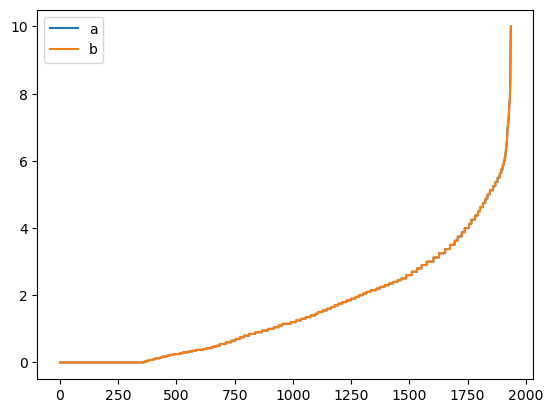

In [89]:
#a and b are not different in redshift span
plt.plot(a['redshift'], label = 'a')
plt.plot(b['redshift'], label = 'b')
plt.legend()

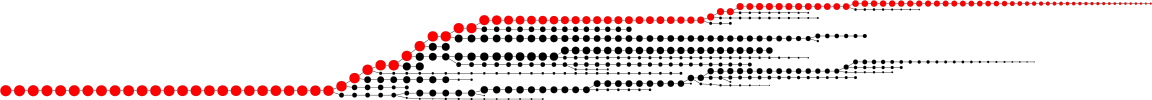

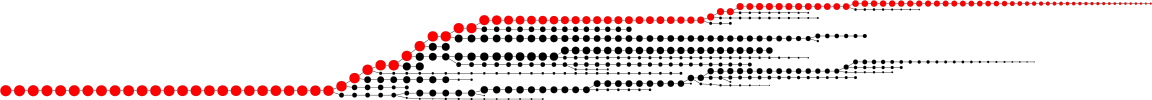

In [98]:
#let's investigate the merger plot
p = ytree.TreePlot(a[0], dot_kwargs={'rankdir': 'LR', 'size': '"12,6"'})
p.save('a[0].png')

p = ytree.TreePlot(b[0], dot_kwargs={'rankdir': 'LR', 'size': '"12,6"'})
p.save('b[0].png')

im = Image.open('a[0].png')
display(im)

im = Image.open('b[0].png')
display(im)

In [104]:
a_0_tree_list, b_0_tree_list = list(a[0]['tree']), list(b[0]['tree'])
a_0_tree_list == b_0_tree_list

False

In [112]:
#Do they contain the exact same node
for t_a, t_b in zip(a_0_tree_list, b_0_tree_list):
    if str(t_a) != str(t_b):
        print(str(t_a), str(t_b))
        
#Since it dosen't print anything they have the same node in the first tree

In [120]:
#Is it true for all tree?
for i in range(len(a)):
    a_tree_list, b_tree_list = list(a[i]['tree']), list(b[i]['tree'])
    for t_a, t_b in zip(a_tree_list, b_tree_list):
        if str(t_a) != str(t_b):
            print(str(t_a), str(t_b))
#yes they contain the same node for all tree

In [132]:
for i in range(len(a)):
    a_tree_list, b_tree_list = list(a[i]['tree']), list(b[i]['tree'])
    for t_a, t_b in zip(a_tree_list, b_tree_list):
        if t_a['mass'] != t_b['mass']:
            print(str(t_a), str(t_b))
#they have also the same mass

In [151]:
for i in range(len(a)):
    a_tree_list, b_tree_list = list(a[i]['tree']), list(b[i]['tree'])
    for t_a, t_b in zip(a_tree_list, b_tree_list):
        if t_a['redshift'] != t_b['redshift']:
            print(str(t_a), str(t_b))
#they have also the same mass

# Since `a` and `b` are equal I can work with just `a`

In [160]:
my_tree = a[0]
print('Number of nodes in the arbor a[0]:', a.size)
print('a[0]["mass"]:', a[0]['mass'])
print('a[0]["redshift"]:', a[0]['redshift'], '\n')
nodes_my_tree = my_tree['tree']
print('Node', 'Redshift', 'Mass')
for node in nodes_my_tree:
    print(node, node['redshift'],  node['mass'])

Number of nodes in the arbor a[0]: 1937
a[0]["mass"]: 33081600000000.0 Msun/h
a[0]["redshift"]: 4.44089e-16 

Node Redshift Mass
TreeNode[0] 4.44089e-16 33081600000000.0 Msun/h
TreeNode[361] 0.025 32916900000000.0 Msun/h
TreeNode[725] 0.05 32626000000000.0 Msun/h
TreeNode[1093] 0.075 31075800000000.0 Msun/h
TreeNode[1467] 0.1 31069200000000.0 Msun/h
TreeNode[1843] 0.125 30819300000000.0 Msun/h
TreeNode[2229] 0.15 30278600000000.0 Msun/h
TreeNode[2615] 0.175 29548800000000.0 Msun/h
TreeNode[3002] 0.2 29050100000000.0 Msun/h
TreeNode[3387] 0.225 28628800000000.0 Msun/h
TreeNode[3775] 0.25 28186500000000.0 Msun/h
TreeNode[4178] 0.275 27735300000000.0 Msun/h
TreeNode[4578] 0.3 27609300000000.0 Msun/h
TreeNode[4987] 0.325 26408500000000.0 Msun/h
TreeNode[5392] 0.35 25987200000000.0 Msun/h
TreeNode[5794] 0.375 24731000000000.0 Msun/h
TreeNode[6208] 0.4 24307500000000.0 Msun/h
TreeNode[6623] 0.425 23957000000000.0 Msun/h
TreeNode[7041] 0.45 23614200000000.0 Msun/h
TreeNode[7460] 0.475 2310780

In [185]:
def my_node(halo):
    prog = list(halo.find_root()['prog', 'uid'])
    if halo['uid'] in prog:
        color = 'red'
    else:
        color = 'black'

    label = \
    """
    id: %d
    mass: %.2e Msun
    z: %.3e 
    """ % (halo['uid'], halo['mass'].to('Msun'), halo['redshift'])
    
    my_kwargs = {"label": label, "fontsize": 8,
                 "shape": "square", "color": color}
    return my_kwargs

p = ytree.TreePlot(my_tree, dot_kwargs={'rankdir': "BT"},
                   node_function=my_node)
p.save('tree_custom_node.png')
im = Image.open('tree_custom_node.png')
display(im)

# Mass distribution

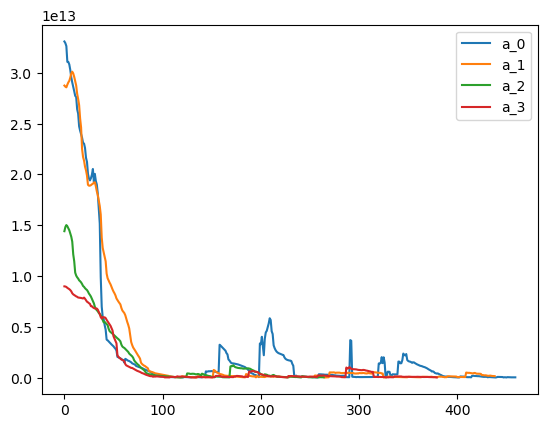

In [221]:
plt.plot(a[0]['tree', 'mass'], label='a_0')
plt.plot(a[1]['tree', 'mass'], label='a_1')
plt.plot(a[2]['tree', 'mass'], label='a_2')
plt.plot(a[3]['tree', 'mass'], label='a_3')

plt.legend()

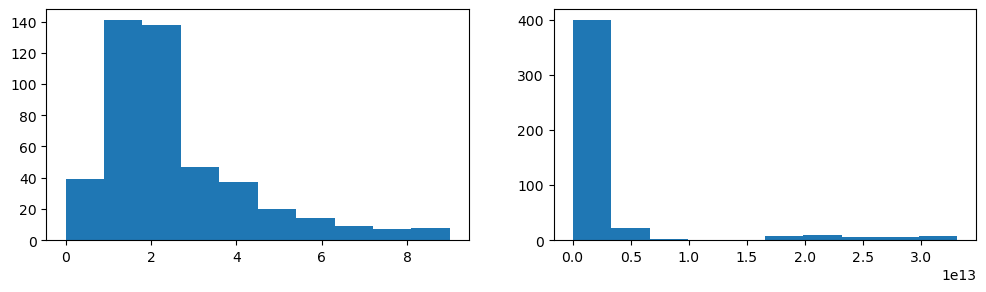

In [202]:
fig, axs = plt.subplots(1, 2, figsize=(12,3))
_ = axs[0].hist(list(a[0]['tree', 'redshift']))
_ = axs[0].set_label('redshift')
_ = axs[1].hist(list(a[0]['tree', 'mass']))
_ = axs[1].set_label('mass')

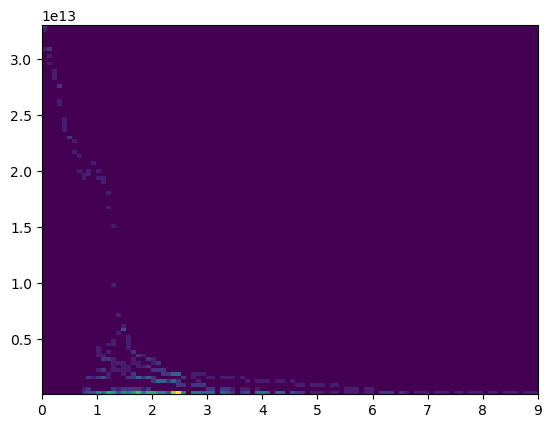

In [211]:
plt.hist2d( list(a[0]['tree', 'redshift']), list(a[0]['tree', 'mass']), bins=(100, 100), density=True);